In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [2]:
# Tempory data frame to pull in the drinks.csv file
temp_df = pd.read_csv("output_data/drinks.csv")

In [3]:
# Display head of data frame. Feel free to delete
temp_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure
0,17222,A1,Cocktail,True,cocktail glass,"['Gin', 'Grand Marnier', 'Lemon Juice', 'Grena...","['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Sh..."
1,13501,ABC,Shot,True,shot glass,"['Amaretto', 'Baileys irish cream', 'Cognac']","['1/3 ', '1/3 ', '1/3 ']"
2,17225,Ace,Cocktail,True,martini glass,"['Gin', 'Grenadine', 'Heavy cream', 'Milk', 'E...","['2 shots ', '1/2 shot ', '1/2 shot ', '1/2 sh..."
3,17837,Adam,Ordinary Drink,True,cocktail glass,"['Dark rum', 'Lemon juice', 'Grenadine']","['2 oz ', '1 oz ', '1 tsp ']"
4,13938,AT&T,Ordinary Drink,True,highball glass,"['Absolut Vodka', 'Gin', 'Tonic water']","['1 oz ', '1 oz ', '4 oz ']"


In [4]:
# List conversion function. Let me know if there are any issues
def convert(s):
    lst = []
    temp = s.split(", ")
    
    for x in temp:
        lst.append(x.translate({ord(i): None for i in "[']"}))
    
    return lst

In [5]:
#-------DATA MANIPULATION----------

# Necessary copy of data frame. The value count is just a test. Feel free to delete that line
glasses_df = temp_df.copy()
glasses_df = glasses_df['Glass'].value_counts()
glasses_df = glasses_df.reset_index()
glasses_df = glasses_df.rename(columns={"Glass":"Count", "index":"Glass"})

glasses_df

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26
5,coffee mug,13
6,punch bowl,7
7,wine glass,7
8,champagne flute,7
9,hurricane glass,6


In [6]:
#-------DATA ANALYSIS-----------------

#define cuttoff value
cutoff_value = 4

#glasses with counts less than cutoff value to be grouped in miscellaneous
miscellaneous = 0 
for i in range(len(glasses_df)):
    count = glasses_df.loc[i,"Count"]
    if glasses_df.loc[i,"Count"] <= cutoff_value:
        miscellaneous +=count
        
        
#drop glasses with less than cutoff value
glasses_df = glasses_df[glasses_df.Count > cutoff_value]

#append DF with item Miscellaneous 
glasses_df = glasses_df.append({"Glass":"miscellaneous", "Count":miscellaneous}, ignore_index = True)

glasses_df

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26
5,coffee mug,13
6,punch bowl,7
7,wine glass,7
8,champagne flute,7
9,hurricane glass,6


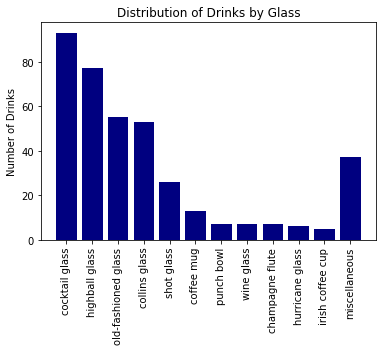

In [7]:
#------DATA DISPLAY-------------

plt.bar(glasses_df.Glass, glasses_df.Count, color = "navy")
plt.xticks(glasses_df.Glass, rotation='vertical')
plt.title("Distribution of Drinks by Glass")
plt.ylabel("Number of Drinks")
plt.savefig('output_data/Glasses_Distribution.png', bbox_inches="tight")

plt.show()

In [10]:
glasses_top5_df = glasses_df.copy()
glasses_top5_df = glasses_top5_df.head(5)
glasses_top5_df

,Glass,Count
0,cocktail glass,93
1,highball glass,77
2,old-fashioned glass,55
3,collins glass,53
4,shot glass,26


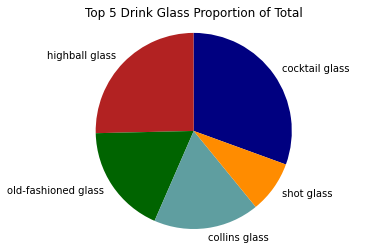

In [13]:
plt.pie(glasses_top5_df.Count, labels = glasses_top5_df.Glass, startangle =-20, colors=["navy", "firebrick", "darkgreen", "cadetblue", "darkorange"])
plt.axis('equal')  

plt.title("Top 5 Drink Glass Proportion of Total")
plt.savefig('output_data/Glasses_Top5_Distribution.png')

plt.show()

### 